In [1]:
# Import necessary packages 
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df= pd.read_csv('drugs_side_effects.csv')

# Inspect the dataset
print (df.shape)
print (df.info())
print (df.head())

(2931, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 n

In [3]:
# Check for missing values
missing_values= df.isnull().sum()
print ("\nTotal missing values:\n",missing_values)

# Check for duplicate rows
duplicates= df.duplicated().sum()
print("\nTotal Duplicates:\n",duplicates)

# Reset index
df.reset_index(drop=True, inplace=True)

# Drop the rows with missing data values
df= df.dropna()


Total missing values:
 drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

Total Duplicates:
 0


In [4]:
# Save the cleaned dataset
df.to_csv('drugs_cleaned_dataset.csv', index=False)

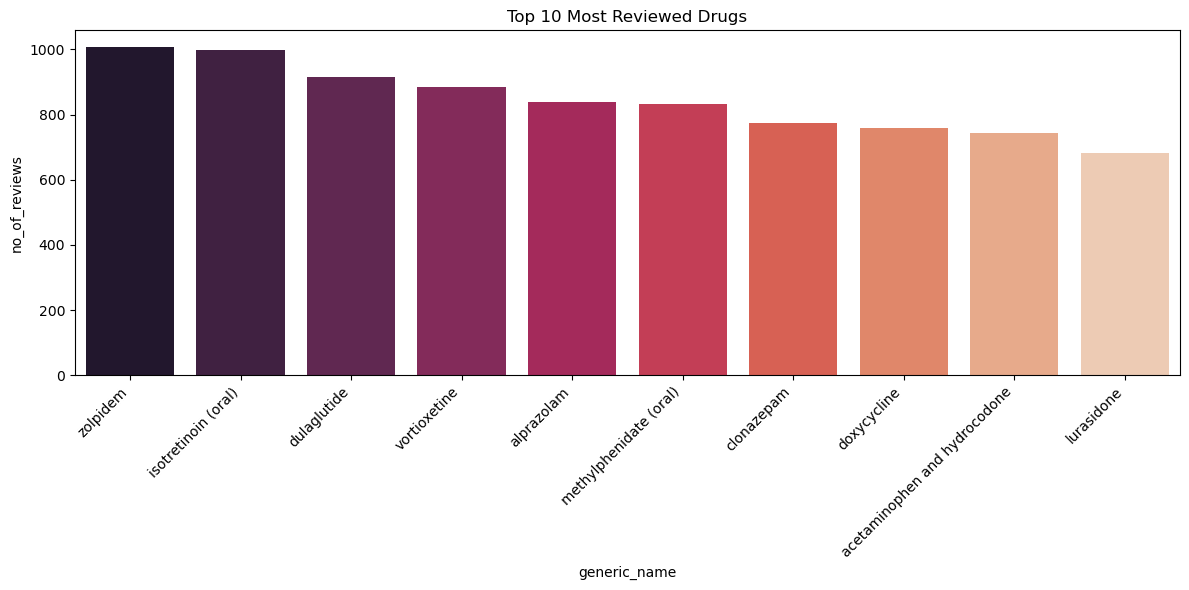

In [5]:
## Exploratory Data Analysis (EDA)

# Top review plot
top_reviewed = df.sort_values('no_of_reviews', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_reviewed, x='generic_name', y='no_of_reviews', hue='generic_name', palette='rocket', legend=False)
plt.title('Top 10 Most Reviewed Drugs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and show the plot
plt.savefig('plots/Top_reviewed_drugs.png')
plt.show()

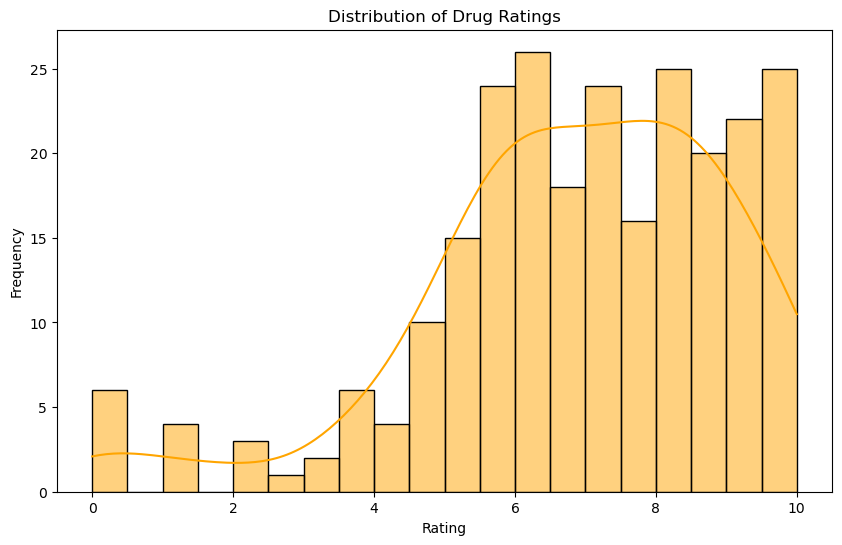

In [6]:
# Distribution of drug ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='orange')
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Save and show the plot
plt.savefig('plots/Distribution_of_Drug_Ratings.png')
plt.show()

PREGNANCY CATEGORIES

The dataset has described the 'pregnancy_category' as follows:

B = Animal reproduction studies have failed to demonstrate a risk to the fetus and there are no adequate and well-controlled studies in pregnant women.

C = Animal reproduction studies have shown an adverse effect on the fetus and there are no adequate and well-controlled studies in humans, but potential benefits may warrant use in pregnant women despite potential risks.

D = There is positive evidence of human fetal risk based on adverse reaction data from investigational or marketing experience or studies in humans, but potential benefits may warrant use in pregnant women despite potential risks.

X = Studies in animals or humans have demonstrated fetal abnormalities and/or there is positive evidence of human fetal risk based on adverse reaction data from investigational or marketing experience, and the risks involved in use in pregnant women clearly outweigh potential benefits.

N = FDA has not classified the drug. 

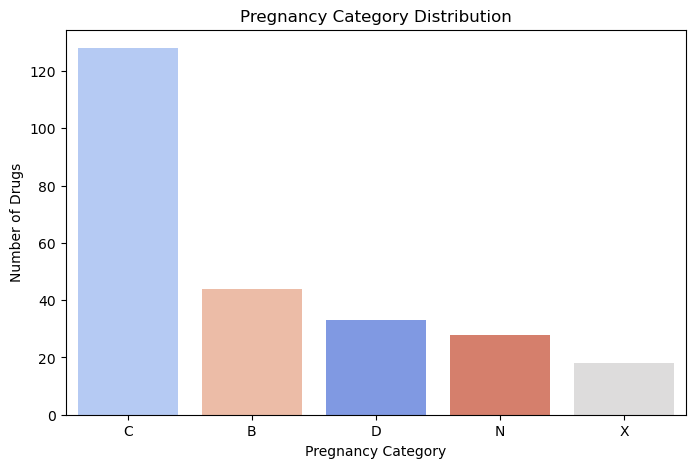

In [7]:
# Pregnancy categories distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='pregnancy_category', order=df['pregnancy_category'].value_counts().index, hue='pregnancy_category', palette='coolwarm', legend=False)
plt.title('Pregnancy Category Distribution')
plt.xlabel('Pregnancy Category')
plt.ylabel('Number of Drugs')

# Save and show the plot
plt.savefig('plots/Distribution_of_Pregnancy_category.png')
plt.show()

CSA (Controlled Substances Act) SCHEDULE

The dataset has listed the Controlled Substances Act (CSA) Schedule as:
 
M = The drug has multiple schedules. The schedule may depend on the exact dosage form or strength of the medication.

N = Is not subject to the Controlled Substances Act. 

2 = Has a high potential for abuse. Has a currently accepted medical use in treatment in the United States or a currently accepted medical use with severe restrictions. Abuse may lead to severe psychological or physical dependence.
 
3 = Has a potential for abuse less than those in schedules 1 and 2. Has a currently accepted medical use in treatment in the United States. Abuse may lead to moderate or low physical dependence or high psychological dependence.
 
4 = Has a low potential for abuse relative to those in schedule 3. It has a currently accepted medical use in treatment in the United States. Abuse may lead to limited physical dependence or psychological dependence relative to those in schedule 3.

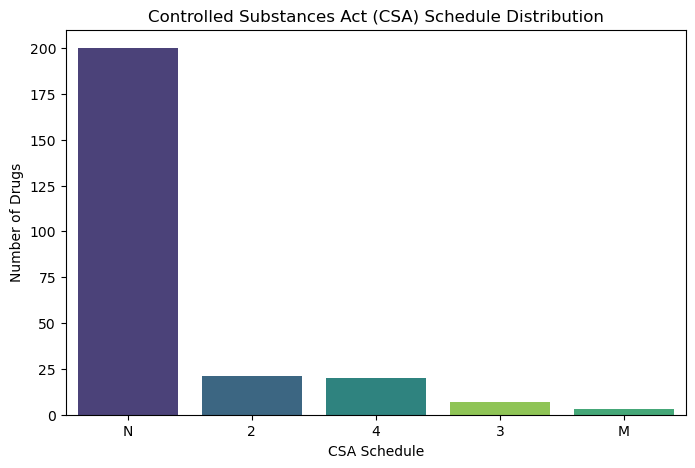

In [8]:
# CSA Schedule Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='csa', order=df['csa'].value_counts().index, hue='csa', palette='viridis', legend= False)
plt.title('Controlled Substances Act (CSA) Schedule Distribution')
plt.xlabel('CSA Schedule')
plt.ylabel('Number of Drugs')

# Save and show the plot
plt.savefig('plots/Distribution_of_CSA_Schedule.png')
plt.show()

RX-To-OTC SWITCH

Rx-to-OTC switch is the transfer of proven prescription drugs to non-prescription, where:

OTC (Over-the-counter) = Medication that can be purchased without a medical prescription 

Rx = Prescription Needed 

Rx/OTC = Prescription or Over-the-counter. 

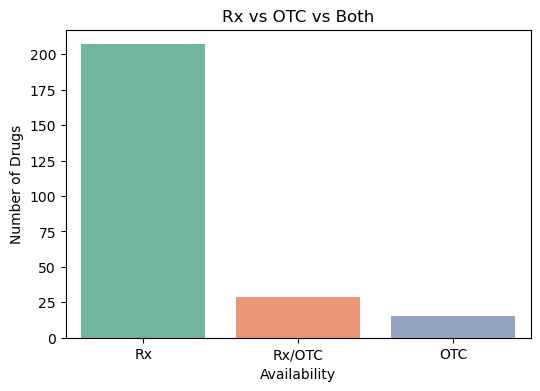

In [9]:
# Rx-OTC Availability plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='rx_otc', order=df['rx_otc'].value_counts().index, hue= 'rx_otc', palette='Set2', legend=False)
plt.title('Rx vs OTC vs Both')
plt.xlabel('Availability')
plt.ylabel('Number of Drugs')

# Save and show the plot
plt.savefig('plots/Rx-OTC.png')
plt.show()

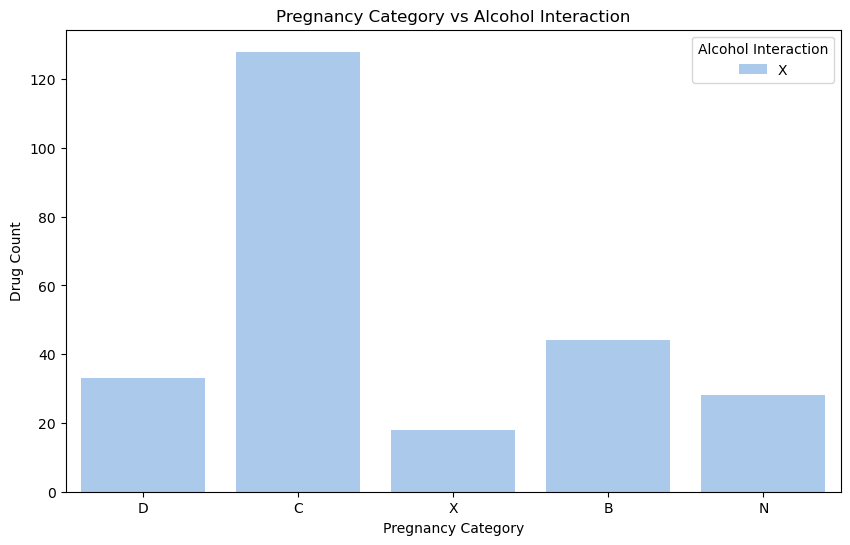

In [10]:
# Pregnancy vs. Alcohol Interaction plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pregnancy_category', hue='alcohol', palette='pastel')
plt.title('Pregnancy Category vs Alcohol Interaction')
plt.xlabel('Pregnancy Category')
plt.ylabel('Drug Count')
plt.legend(title='Alcohol Interaction', loc='upper right')

# Save and show the plot
plt.savefig('plots/Pregnancy_vs._Alcohol_Interaction.png')
plt.show()

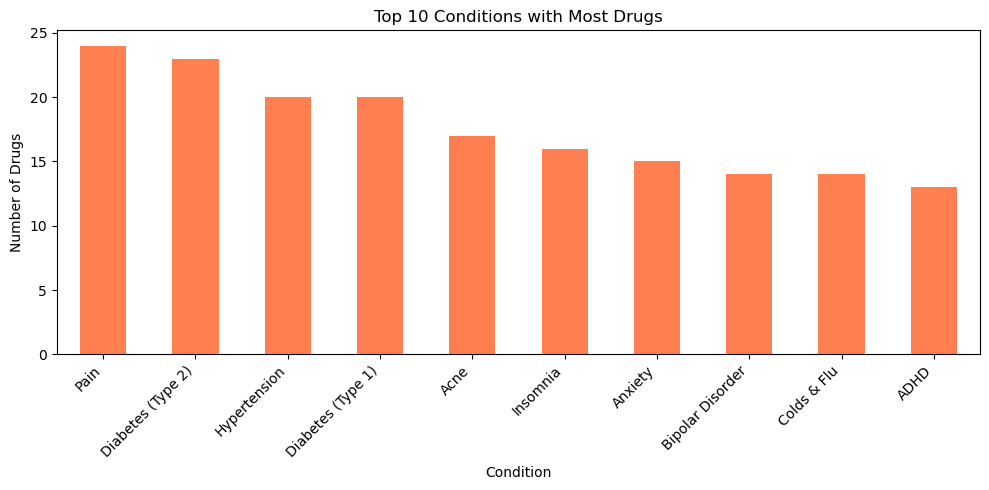

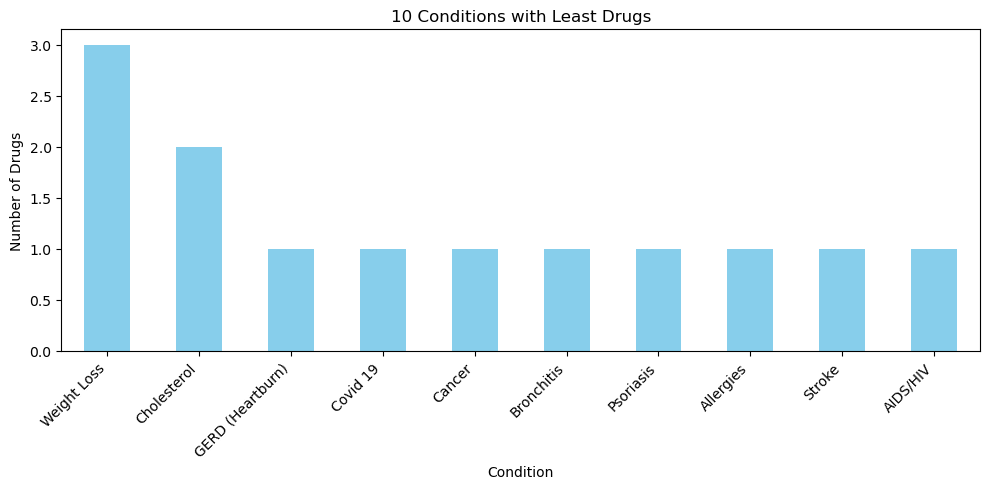

In [11]:
# Conditions with the most and the least drugs

condition_counts = df['medical_condition'].value_counts()

# Top 10 conditions
plt.figure(figsize=(10, 5))
condition_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Conditions with Most Drugs')
plt.xlabel('Condition')
plt.ylabel('Number of Drugs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and show the plot
plt.savefig('plots/Conditions_with_most_drugs.png')
plt.show()

# Bottom 10 (least treated)
plt.figure(figsize=(10, 5))
condition_counts.tail(10).plot(kind='bar', color='skyblue')
plt.title('10 Conditions with Least Drugs')
plt.xlabel('Condition')
plt.ylabel('Number of Drugs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and show the plot
plt.savefig('plots/Conditions_with_least_drugs.png')
plt.show()

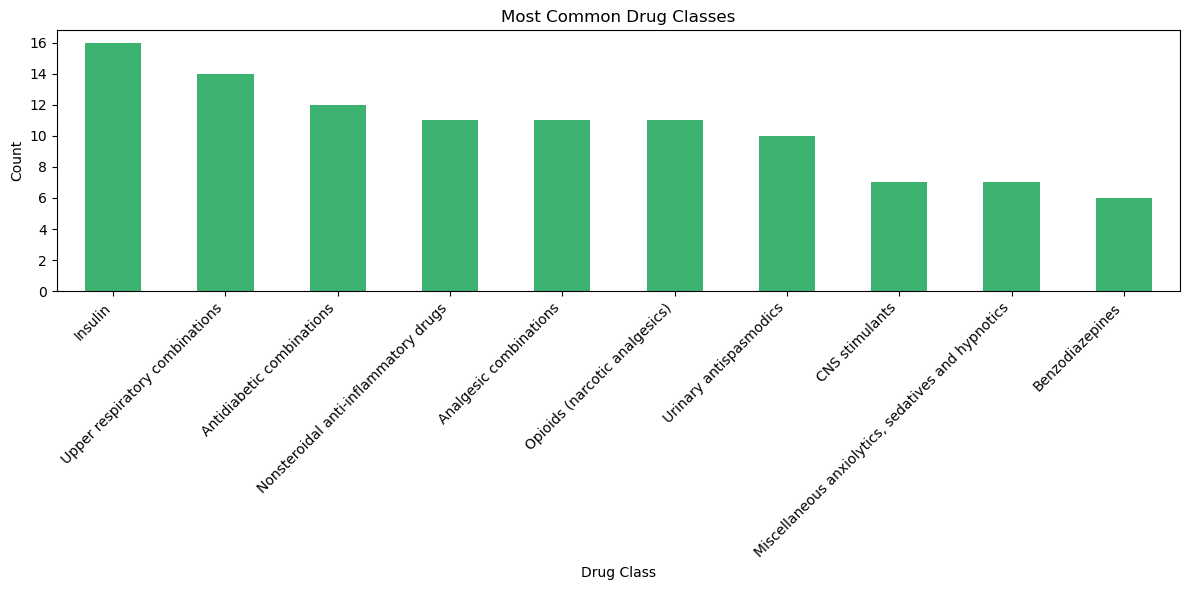

In [12]:
# Most used drug class plot
plt.figure(figsize=(12, 6))
df['drug_classes'].value_counts().head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Most Common Drug Classes')
plt.xlabel('Drug Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and show the plot
plt.savefig('plots/Most_used_drug_class.png')
plt.show()

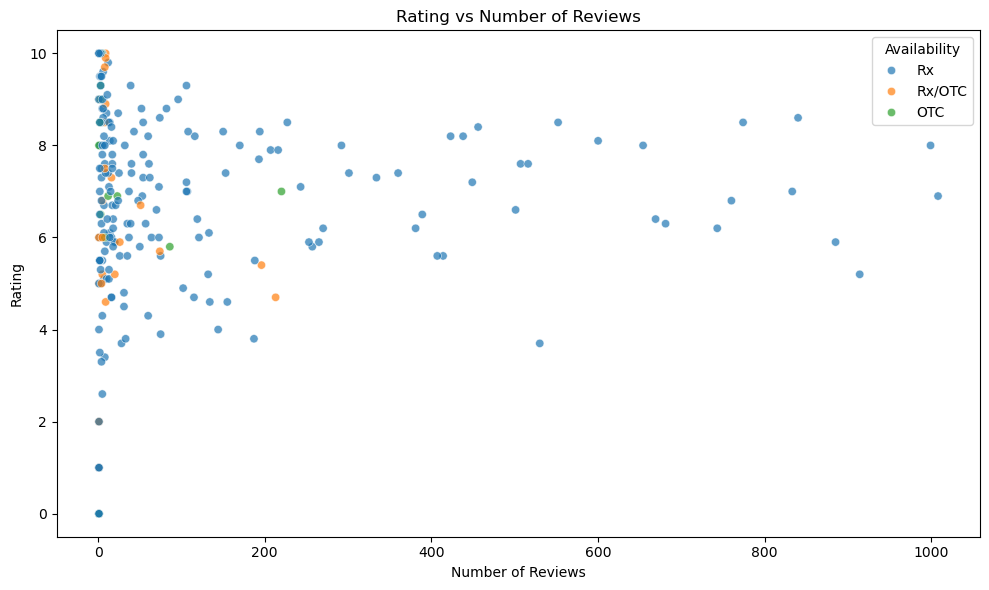

In [13]:
# Ratings vs. Reviews Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='no_of_reviews', y='rating', hue='rx_otc', alpha=0.7)
plt.title('Rating vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.legend(title='Availability')
plt.tight_layout()

# Save and show the plot
plt.savefig('plots/Ratings_vs._Reviews.png')
plt.show()

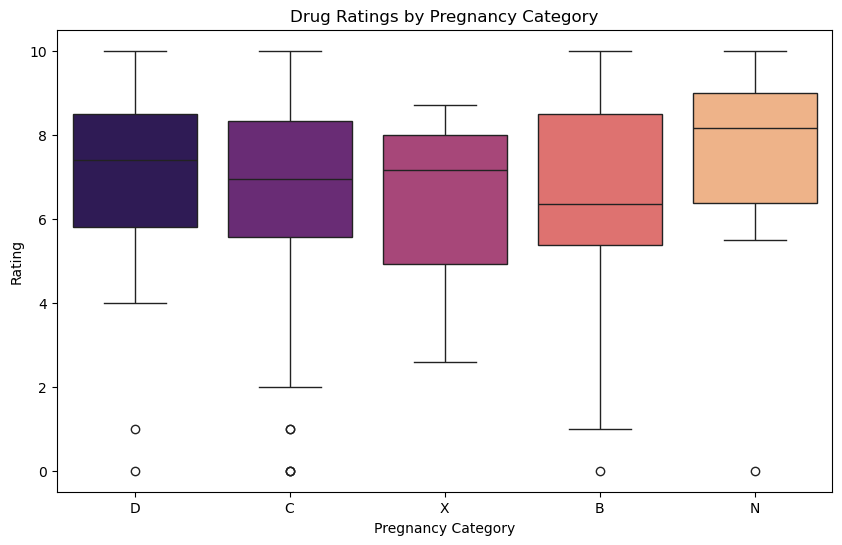

In [14]:
# Drug ratings by pregnancy
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='pregnancy_category', y='rating', hue='pregnancy_category', palette='magma', legend=False)
plt.title('Drug Ratings by Pregnancy Category')
plt.xlabel('Pregnancy Category')
plt.ylabel('Rating')

# Save and show the plot
plt.savefig('plots/Drug_Ratings_by_Pregnancy.png')
plt.show()

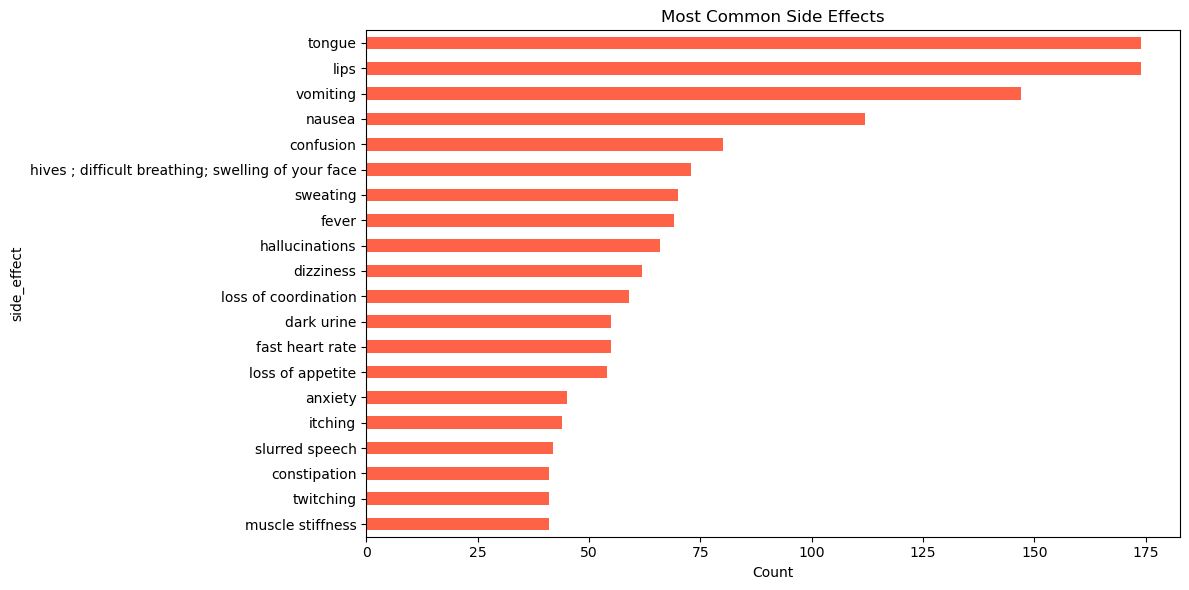

In [15]:
# Side-effects per drug
df_se = df.copy()
df_se['side_effects'] = df_se['side_effects'].astype(str).str.lower()
df_ses = df_se.assign(side_effect=df_se['side_effects'].str.split(',')).explode('side_effect')
df_ses['side_effect'] = df_ses['side_effect'].str.strip()

# Top 20 side effects
top_side_effects = df_ses['side_effect'].value_counts().head(20)

plt.figure(figsize=(12, 6))
top_side_effects.plot(kind='barh', color='tomato')
plt.title('Most Common Side Effects')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.tight_layout()

# Save and show the plot
plt.savefig('plots/Common_Side_effects.png')
plt.show()

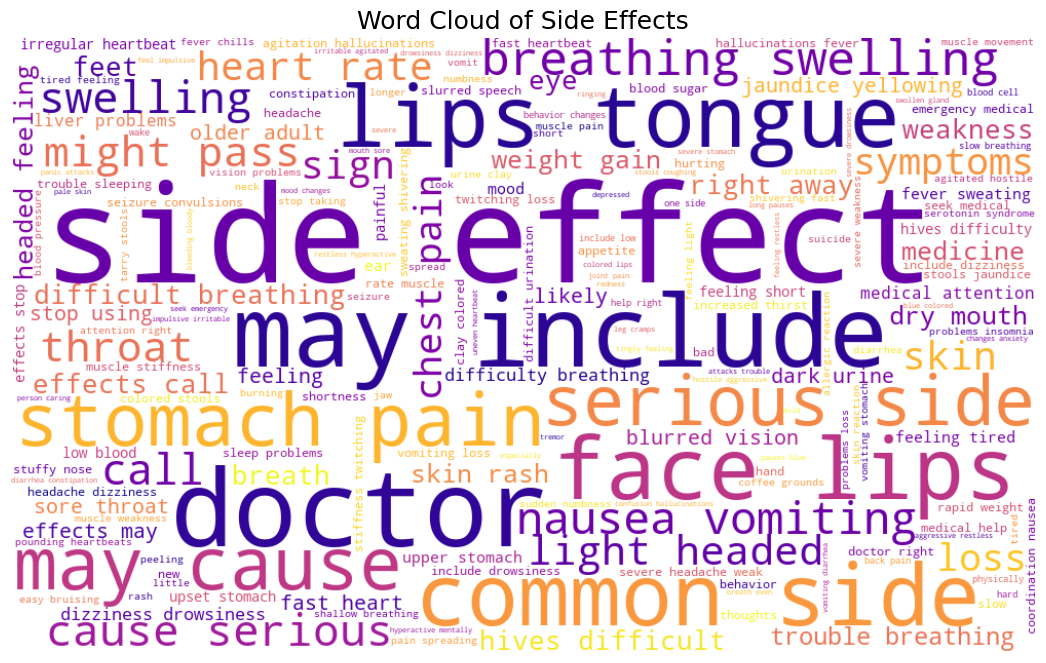

In [16]:
## ADVANCED ANALYTICS
# Wordcloud of 'Side Effects'
from wordcloud import WordCloud, STOPWORDS

side_effects_text = ' '.join(df_ses['side_effect'].dropna().astype(str))

wordcloud = WordCloud(width=1000, height=600, background_color='white',
                      stopwords=STOPWORDS, colormap='plasma').generate(side_effects_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Side Effects', fontsize=18)

# Save and show the plot
plt.savefig('plots/Wordcloud_Side_effects.png')
plt.show()

In [25]:
## Biopharma lookup Tool

# Converting relevant columns are lowercase
df.columns = df.columns.str.strip().str.lower()

# Standardize searchable string columns
for col in ['generic_name', 'brand_names', 'medical_condition', 'side_effects']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower()

def results(match_df, search_term, search_type):
    print(f"\n Found {len(match_df)} result(s) for {search_type}: '{search_term}'\n")
    for _, row in match_df.iterrows():
        print(f" DRUG: {row.get('generic_name', 'N/A').title()}")
        print(f" BRAND NAME(s): {row.get('brand_names', 'N/A').title()}")
        print(f" CONDITION: {row.get('medical_condition', 'N/A').title()}")
        print(f" SIDE EFFECTS: {row.get('side_effects', 'N/A')}")
        print(f" ACTIVITY: {row.get('activity', 'N/A')}")
        print(f" RATING: {row.get('rating', 'N/A')}")
        print(f" MORE INFO: {row.get('drug_link', 'N/A')}\n")
        print('-' * 60)

def search_drugs_and_diseases():
    print("✨ Welcome to the Drug & Disease Lookup Tool ✨")
    print(" Type 'exit' to leave this lookup tool \n")

    while True:
        user = input("🔍 Enter a drug name or a disease/condition: ").strip().lower()

        if user in ['exit']:
            print("👋 Exiting the tool. Stay healthy!")
            break

        if not user:
            print("⚠️ Error 404. Not Found!")
            continue

        # Search by drug name
        drug_match = df[df['generic_name'].str.contains(user, na=False)]

        # Search by condition
        condition_match = df[df['medical_condition'].str.contains(user, na=False)]

        if not drug_match.empty:
            results(drug_match, user, "drug")
        elif not condition_match.empty:
            results(condition_match, user, "condition")
        else:
            print(f"🚫 Error 404: '{user}' Not Found!\n The drug/condition is not listed in our dataset \n")

# Launch it
search_drugs_and_diseases()

✨ Welcome to the Drug & Disease Lookup Tool ✨
 Type 'exit' to leave this lookup tool 



🔍 Enter a drug name or a disease/condition:  CANCER



 Found 1 result(s) for condition: 'cancer'

 DRUG: Ifosfamide
 BRAND NAME(s): Ifex
 CONDITION: Cancer
 SIDE EFFECTS: fever, chills, flu symptoms; mouth and throat ulcers; skin sores, pale skin, cold hands and feet; easy bruising, unusual bleeding; rapid heart rate, shallow breathing; or feeling light-headed or short of breath. call your doctor at once if you have any of these side effects: confusion, unusual thoughts or behavior, hallucinations, seizure (convulsions); little or no urination, painful or difficult urination, blood in your urine; loss of bladder control; a seizure; muscle movements you cannot control; problems with your hearing or vision, ringing in your ears; sudden chest pain, wheezing, dry cough; dark urine, jaundice (yellowing of the skin or eyes); or a wound that will not heal. common side effects of ifosfamide may include: nausea and vomiting ; confusion, vision problems, thinking problems; numbness , tingling, burning pain; infections; urination problems; or hair 

🔍 Enter a drug name or a disease/condition:  EXIT


👋 Exiting the tool. Stay healthy!
